In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Training and Testing Unlabelled Data 

In [63]:
d = pd.read_csv('train_file.csv')
d.head() #Printing data of 1st 5 rows based on target variable

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [64]:
print(d.index)
print(d.columns)

RangeIndex(start=0, stop=85895, step=1)
Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')


In [65]:
d.shape

(85895, 32)

In [66]:
d.isnull().any()  # Look out for object dtypes

ID                                   False
LICENSE ID                           False
ACCOUNT NUMBER                       False
SITE NUMBER                          False
LEGAL NAME                           False
DOING BUSINESS AS NAME                True
ADDRESS                              False
CITY                                 False
STATE                                False
ZIP CODE                              True
WARD                                  True
PRECINCT                              True
WARD PRECINCT                         True
POLICE DISTRICT                       True
LICENSE CODE                         False
LICENSE DESCRIPTION                  False
LICENSE NUMBER                        True
APPLICATION TYPE                     False
APPLICATION CREATED DATE              True
APPLICATION REQUIREMENTS COMPLETE     True
PAYMENT DATE                          True
CONDITIONAL APPROVAL                 False
LICENSE TERM START DATE               True
LICENSE TER

In [67]:
e = pd.read_csv('test_file.csv')
e.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,...,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,...,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,...,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,...,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,...,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [68]:
e.shape

(57239, 31)

In [69]:
my_submission = pd.DataFrame({'ID': e.ID}) # Subset of e(testing data) 
my_submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


In [70]:
my_submission.shape

(57239, 1)

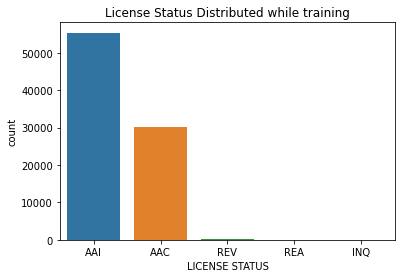

In [71]:
plt.title('License Status Distributed while training')
sns.countplot(d['LICENSE STATUS']) # Calculating number of occurences of each string categorically
plt.show()

In [72]:
d.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49701
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [73]:
e.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER